# Creating custom plotting functions with matplotlib

>TLDR
Define your own functions that involve plotting onto a specifc axes with the following syntax:
```python
def custom_plot(x, y, ax=None, **plt_kwargs):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y, **plt_kwargs) ## example plot here
    return(ax)
```
> or:
```python
def multiple_custom_plots(x, y, ax=None, plt_kwargs={}, sct_kwargs={}):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y, **plt_kwargs) #example plot1
    ax.scatter(x, y, **sct_kwargs) #example plot2
    return(ax)
```

In a previous post, I showed you how to better organize your figures. We saw how you could neatly display your different plots using subplots, how to add free-floating axes and how to easily create a tiled organization of your axes with GridSpec. 

Because the focus of that post was the general structure and presentation of the overall figure, the plots themselves were quite simple in that they were only using one pre-defined matplotlib function such as ```.plot``` or ```.hist``` with the default parameters. Often times though, within the nice tiled structure that you learned in the previous post, you will need to draw a specifc plot of your own that combines information from different types of basic plotting functions along with calls to some other data-generating or data-processing function. For example, plotting the distribution of random samples with its corresponding theoretical density function on top.

Here, I will show you how to create your own custom plotting functions that can be easily used by calling them within your organized plots with something like the following:

```python
fig, axes = plt.subplots(number_of_subplots)
for ax in axes:
    my_custom_plotting_function(ax=ax, function_kwargs)
```
![final plot](finalplot.png)

Together with a nice organization of the subplots, this will help you maximize your static plotting on matplotlib (foreshadowing a dynamics plots tutorial follow-up.... maybe...) and leverage information from different plots to share a comprehensive story of your data.

# Dependencies

In [1]:
# numerical
import numpy as np
from scipy import stats

# plotting - basic
import matplotlib.pyplot as plt

## Basic syntax
### Passing the axes
The first step in being able to have a series of custom plots within your figure is being able to connect an individual custom plot to an individual axes. The first step then is to be able to pass the axes on which we want to plot to our custom function. This can be done simply like this:

In [2]:
def custom_plot(x, y, ax=None, **plt_kwargs):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y, **plt_kwargs) ## example plot here
    return(ax)

So what did I do there? The first relevant part here is the argument ```ax```. If you have used *seaborn* before, you might already know how to use this. Essentially, ```ax``` will be taking the axes object onto which you want to plot. This can be a subplot axes or a simple free floating inset axes. The idea is that the organization part of the plot would be dealt outside of this function, potentially by another function.

Why does ```ax``` default to ```None``` though? This is better answered by the lines:
```python
if ax is None:
        ax = plt.gca()
```
we see that if no axes object was provided in ```ax```, it defaults to ```None``` and triggers this ```if``` condition. In this case, since no axes was given, by default, the function would look for the last axes used in the current figure, or create one if there are none available, with the function ```.gca``` (which stands for *get current axes*) and use that as the axes on which to plot. At the end of the function, we also return this ax, in case we want to use it for other customizations (not needed but practical in some cases).

Let's test this by first plotting without specifying the axes and then by providing a specific axes:

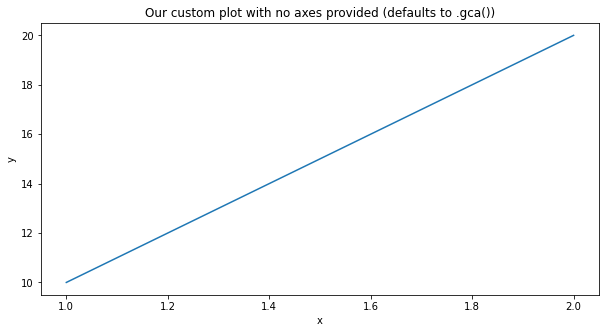

In [3]:
# Without providing axes (default to None -> gca())
plt.figure(figsize=(10, 5))
custom_plot([1, 2], [10, 20])
plt.title('Our custom plot with no axes provided (defaults to .gca())')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

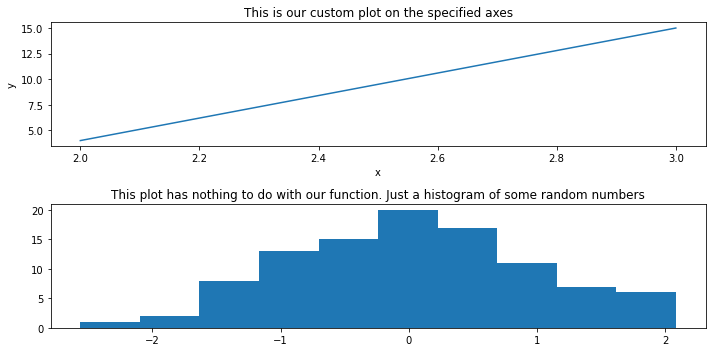

In [4]:
# Providing the axes
fig, axes = plt.subplots(2, figsize=(10, 5))

# Plotting with our function
custom_plot([2, 3], [4, 15], ax=axes[0])
axes[0].set(xlabel='x', ylabel='y', title='This is our custom plot on the specified axes')

# Example plot to fill the second subplot (nothing to do with our function)
axes[1].hist(np.random.normal(size=100))
axes[1].set_title('This plot has nothing to do with our function. Just a histogram of some random numbers')

plt.tight_layout() #This to avoid overlap of labels and titles across plots
plt.show()


### Passing the plot's keyword arguments
So far so good; we can create a function to plot data and we can connect it to a specific axes of our plot (it even takes care of itself if no axes was provided). What about the ```**plt_kwargs``` though?

If you are not used to working with ```**kwargs``` (as in keyword arguments) in your functions (the actual name of the argument doesn't matter, you can name it ```**kwargs```, ```**plt_kwargs```, ```**literally_anything_else``` as long as you put the double asterisk " \** ") it will be easier to explain by first creating and using a new function that does not have ```**kwargs``` in it.

As an aside though, if you really haven't see this type of asterisk notation before, the use of single asterisks ```*``` and double asterisks ```**``` in python is quite useful in many situations, whether it is within or outside of functions, and definitely worth a google search (maybe even writing a blog post about it.... maybe...). Anyway, back to our example of ```custom_plot``` without ```**kwargs```:

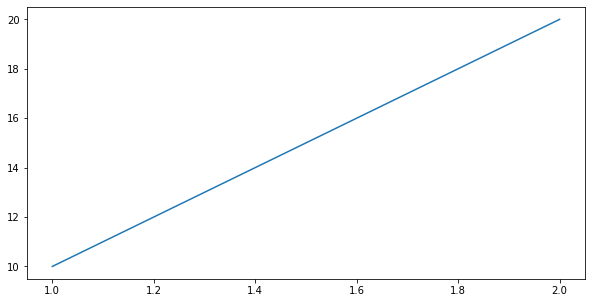

In [5]:
def no_kwargs_plot(x, y, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y) ## example plot here
    return(ax)

plt.figure(figsize=(10, 5))
no_kwargs_plot([1, 2], [10, 20])
plt.show()

No errors, no problems... However, what if you wanted to make the line thicker? Normally in ```.plot()``` we would simply set the argument ```linewidth``` to a thicker value. We could add ```linewidth``` to the list of inputs to ```no_kwargs_plot``` and then pass it to ```.plot()``` like this:
```python
def no_kwargs_plot(x, y, ax=None, linewidth=1):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y, linewidth) ## example plot here

```
That would take care of the problem. But what about all the other possible arguments into plot. Having to write them all in our function along with their default values would be really long and not very practical:
```python
def no_kwargs_plot(x, y, ax=None, linewidth=1, other=1,...):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y, linewidth, other,....) ## example plot here

```
That's where the use of ```**``` notation (```**kwargs```) becomes useful. When used on free key-value elements, such as orphan inputs in our function (those that are not associated with pre-defined arguments x, y and ax in our case) ```**name``` will pack all of this elements into a dictionary and store them in the variable ```name```.

For example, if we were to use our plotting function as ```custom_plot(x=xdata, y=ydata, ax=axes[0], linewidth=2, c='g')```, the resulting ```plt_kwargs``` dictionary would be ```{'linewidth':2, 'c':'g'}```. If this is still not quite clear, look at the sample code and the schema that comes after it:

In [23]:
def print_kwargs_only(x, y, ax=None, **plt_kwargs):
    print(plt_kwargs) #to print the dictionary with all the orphan kwargs

print_kwargs_only(x=[1, 2], y=[10, 20], not_xyax=1, random_orphan_kwarg='so lonely', linewidth=2, c='g')

{'not_xyax': 1, 'random_orphan_kwarg': 'so lonely', 'linewidth': 2, 'c': 'g'}


$\text{print_kwargs_only}(\overbrace{\text{x=[1, 2], y=[10, 20]}}^\text{part of the defined inputs}\text{, }\underbrace{\text{  not_xyax=1,  random_orphan_kwarg='so lonely',  linewidth=2, c='g'}}_\text{not part of the defined inputs})$


$$
\begin{align}
\\
&& \text{**plt_kwargs (packing)} &&\\
\Rightarrow \text{not part of the defined inputs} &&---------->&& \text{plt_kwargs = {not part of the defined inputs}}
\end{align}
$$

So using ```**``` solves the problem of taking all the possible plotting inputs into our function without needing to explicitely pre-define them and having them ready to use inside a dictionary. How is this dictionary of supplementary keyword arguments used, though?

Previously, I mentioned that ```**``` behaved like a packing function when used on free elemenets. When you use ```**``` on a dictionary though (whether it was packed by ```**``` or not), ```**``` will actually do the opposite action it did before: it will unpack the dictionary into different free elements. In the ```custom_function```, when we write ```**plt_kwargs``` inside ```.plot()```, *i.e.* ```ax.plot(x, y, **plt_kwargs)```, we are actually asking python to take the dictionray ```plt_kwargs``` and unpack all of its key-value pairs separately into the ```.plot()``` function as individual inputs.
$$
\begin{align}
\\
&& \text{**plt_kwargs (unpacking)} &&\\
\Rightarrow \text{plt_kwargs = {not part of the defined inputs}}&& ----------> && \text{not part of the defined inputs}
\end{align}
$$

In that way, without knowing how many and which plot customizations will be used, we can pass them all to the part of our function that will be doing the plotting.

We can see this using again our original ```custom_plot``` function (you might notice that this time I used the axes returned by the function to show you how it can be used):

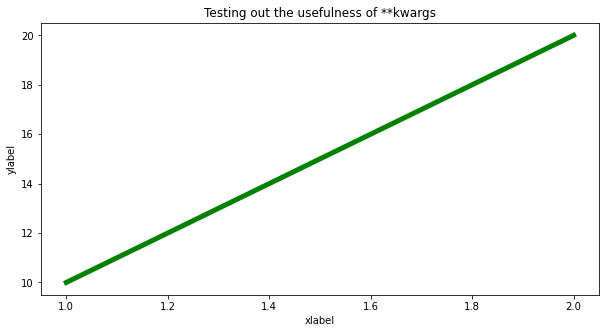

In [7]:
plt.figure(figsize=(10, 5))
out_ax = custom_plot([1, 2], [10, 20], linewidth=5, c='g')
out_ax.set(xlabel='xlabel', ylabel='ylabel', title='Testing out the usefulness of **kwargs')
plt.show()

### Extension to the basic syntax
That takes care of the basic syntax then. With that you should already be able to start producing some more interesting plots.

Before going ham though, we need to take care of one potenial issue you might run into when using ```**kwargs```. That is, what if you were doing multiple plots inside of the ```custom_plot``` function? for example, what if you were plotting two lines and one should be dashed, while the other one was just solid. How would ```**kwargs``` know which arguments go into which plot?

The answer is that "```**kwargs``` the packing machine" wouldn't work any more and would need to be replaced, but "```**kwargs``` the unpacking machine" would work perfectly fine. What do I mean by this? Let's define a new function called ```multiple_custom_plots``` to clarify it:

In [8]:
def multiple_custom_plots(x, y, ax=None, plt_kwargs={}, sct_kwargs={}):
    if ax is None:
        ax = plt.gca()
    ax.plot(x, y, **plt_kwargs)
    ax.scatter(x, y, **sct_kwargs)
    return(ax)

What is different here and how should we use it? First, look at the list of possible inputs. Now, instead of having ```**kwargs```, we have two new arguments, one for each of our plots. Also, by default, these arguments are empty dictionaries.

If you followed my explanation before about ```**kwargs``` hopefully this is already quite clear for you. The idea is that since we cannot ask the function to automatically pack all the orphan inputs into one dictionary (we need two separate dictionaries now) we will instead have to provide each dictionary of plotting parameters ourselves, pre-packed.

Using them later with the double asterisk is no different than original ```custom_plot``` since using ```**``` on a dictionary still means that we want its values unpacked. We use empty dictionaries as default values because if you didn't provide a dictionary of customizations, we would run into problems when trying to unpack them (or the lack of them) with ```**```. The empty dictionaries essentially are there to unpack nothing into the functions if nothing is provided.

Let's see how we would use this:

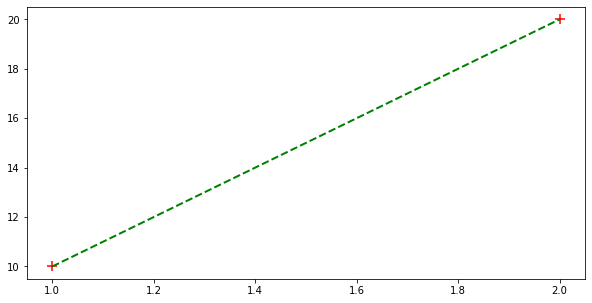

In [9]:
plot_params = {'linewidth': 2, 'c': 'g', 'linestyle':'--'}
scatter_params = {'c':'red', 'marker':'+', 's':100}
xdata = [1, 2]
ydata = [10, 20]

plt.figure(figsize=(10, 5))
multiple_custom_plots(xdata, ydata, plt_kwargs=plot_params, sct_kwargs=scatter_params)
plt.show()

## Quick application

So, when it comes to creating custom functions from which you can plot, the previous section should be enough for you to have quite a bit of fun for a while with static plots. In this next section, I will simply give you an example of a plot using a custom function hopefully to inspire you to go do some plots of your own.

###  Sample size of random samples and Kernel Density Estimation

Imagine you wanted to see how the size of a sample from a given random variable affects the estimation of its underlying probability distribution.

Let's assume we have a continuous random variable $X$ that is normally distributed with a mean $\mu$ and a standard deviation $\sigma$ (*i.e.* $X \sim \mathcal{N}\left(\mu, \sigma^2\right)$). We would like to know how scipy's kernel density estimator (kde) is affected by the size of our random sample (how many times we sample randomly from our normal distribution) by comparing it to the estimate of the underlying true probability density distribution (pdf).

We will do this by plotting the samples themselves, their kde and their underlying pdf for different values of N.

In [10]:
def sample_plot(mu=0, sigma=1, N=100, sct_kwargs={}, pdf_kwargs={}, kde_kwargs={}, ax=None):
    # generate sample
    sample = np.random.normal(loc=mu, scale=sigma, size=N)
    
    # generate pdf
    xrange = mu + 5*sigma*np.linspace(-1, 1, 100)
    pdf = stats.norm.pdf(xrange, loc=mu, scale=sigma)
    
    # generate kde
    estimation = stats.gaussian_kde(sample)
    kde = estimation(xrange)
    
    #Plotting
    if ax is None:
        ax = plt.gca()   
    ax.scatter(sample, np.zeros_like(sample), **sct_kwargs)
    ax.plot(xrange, pdf, **pdf_kwargs)
    ax.plot(xrange, kde, **kde_kwargs)
    return(xrange)

Let's deconstruct the function one step at a time:

First, the inputs. Here, instead of asking for arrays of data, we will be creating our own data from a gaussian random number generator. So we need to ask for the relevant statistical parameters $\mu$ and $\sigma$ (the mean and standard deviation respectively for gaussian distributions). We also need to ask the number of samples $N$ to be taken. We will actually be iterating over different values of **$N$** later to see the effect of the sample size on the estimation. The idea is to plot the samples as scatter points, and the pdf and kde as regular line plots. So we will provide as inputs a dictionary for their respective plotting parameters (linewidth, marker size, etc.). Finally, we will ask the axes of the figure on which we want to plot all three things.

The first section of the function will simply generate a random gaussian sample of size $N$ from the statistical parameters provided.

The second part of the code will create the x-y pairs of the line plot corresponding to the pdf of the normal distribution given by $\mu$ and $\sigma$. We limit the range of the pdf to $\pm$5 standard deviations since anything further on either side is going to be quite small anyway.

The third part of the code is first calculating the kde of our sample and then applying it to the same range of values on the x-axis as our pdf.

FInally, in the fourth part of the code, we simply plot as a scatter plot all the sampled values on the x-axis (at a height of 0), and the pdf and kde as line plots. All three, with their respective plotting keyword arguments.

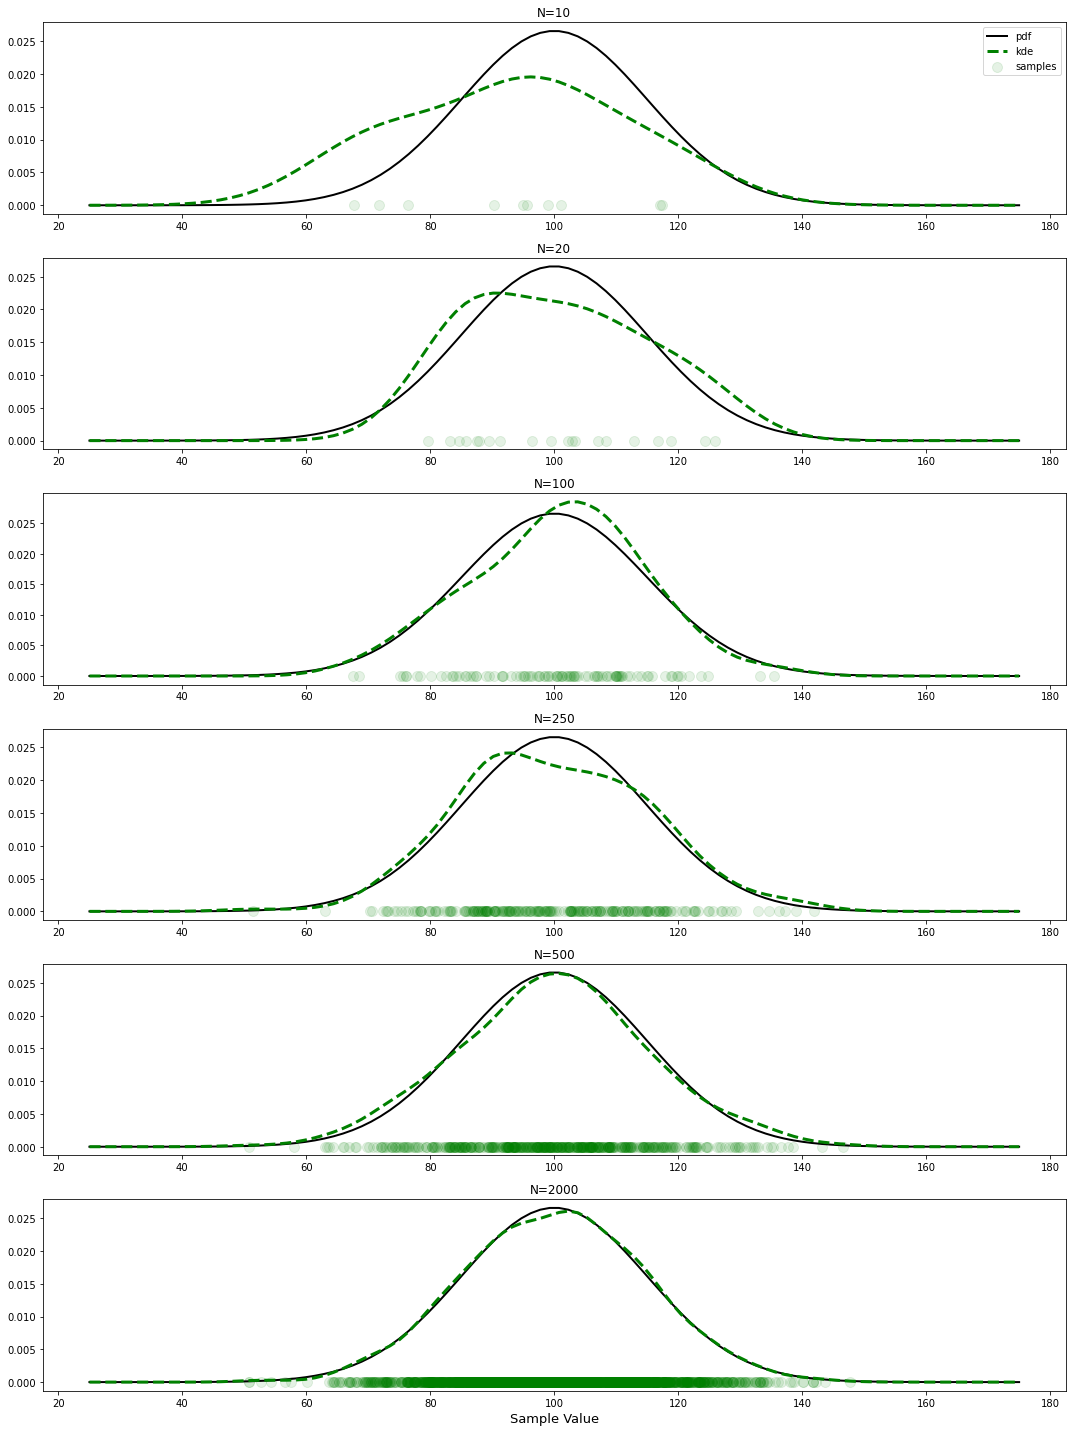

In [12]:
# Sample parameters
sample_sizes = [10, 20, 100, 250, 500, 2_000]
mean = 100
std = 15

# Plotting parameters
scatter_params = {'alpha':0.1, 'c':'g', 's':100, 'label':'samples'}
pdf_params = {"linewidth":2, 'c':'k', 'label':'pdf'}
kde_params = {"linewidth":3, 'ls':'--', 'c':'g', 'label':'kde'}

# Plotting
fig, axes = plt.subplots(6, figsize=(15, 20))
for ax, n in zip(axes, sample_sizes):
    sample_plot(mu=mean, sigma=std, N=n, ax=ax,
                sct_kwargs=scatter_params, pdf_kwargs=pdf_params, kde_kwargs=kde_params)
    ax.set_title(f'N={n}')

axes[0].legend()
axes[-1].set_xlabel('Sample Value', fontsize=13)
plt.tight_layout()
plt.savefig('finalplot')
plt.show()

And that's it! Hopefully you learned how to add plotting abilities to your functions by properly passing the corresponding axes and keyword arguments. This should help you have increasingly modular code to quickly explore and visualize your data.